<a href="https://colab.research.google.com/github/ViewKridsakorn/Data-Analyst-Project/blob/main/Python/Car_data_predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression,Random Forest Regression ,XGBoost Regression in Machine Learning.
The columns in the given dataset are as follows :



1. name
2. year
3. selling_price
4. km_driven
5. fuel
6. seller_type
7. transmission
8. Owner













# Step 1. Data preview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df = df.drop('Year',axis = 1)
df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# step 2. EDA. Analysis

In [7]:
#Explore Car Names
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

<Axes: xlabel='Selling_Price'>

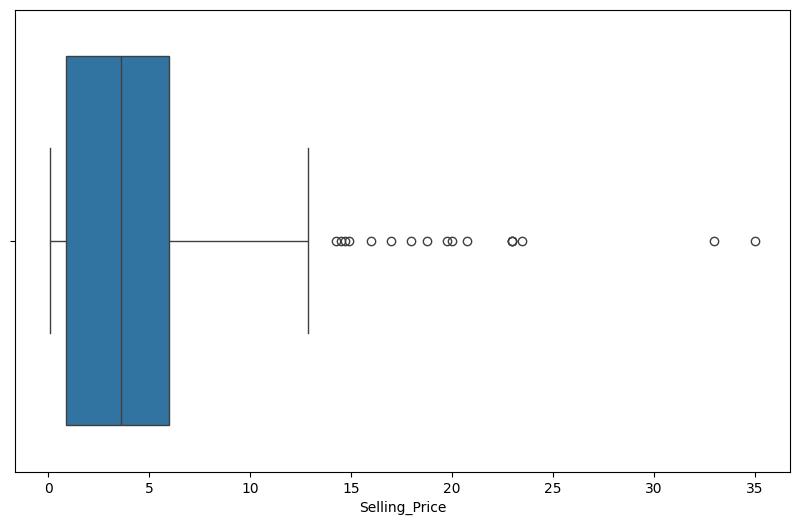

In [8]:
#Visulize selling price distribution
plt.figure(figsize=(10,6))
sns.boxplot(df,x = "Selling_Price")

In [9]:
##find top 10 highest car total selling price
carprice = df[['Car_Name','Selling_Price']]
highcarprice = carprice.groupby('Car_Name').sum('Selling_Price')\
               .sort_values('Selling_Price',ascending=False)
highcarprice = highcarprice.head(10)

highcarprice['Selling_Price'] = highcarprice['Selling_Price'].round()
highcarprice

,Selling_Price
Car_Name,
fortuner,206.0
city,193.0
innova,115.0
corolla altis,115.0
verna,86.0
ciaz,67.0
brio,47.0
i20,43.0
jazz,41.0


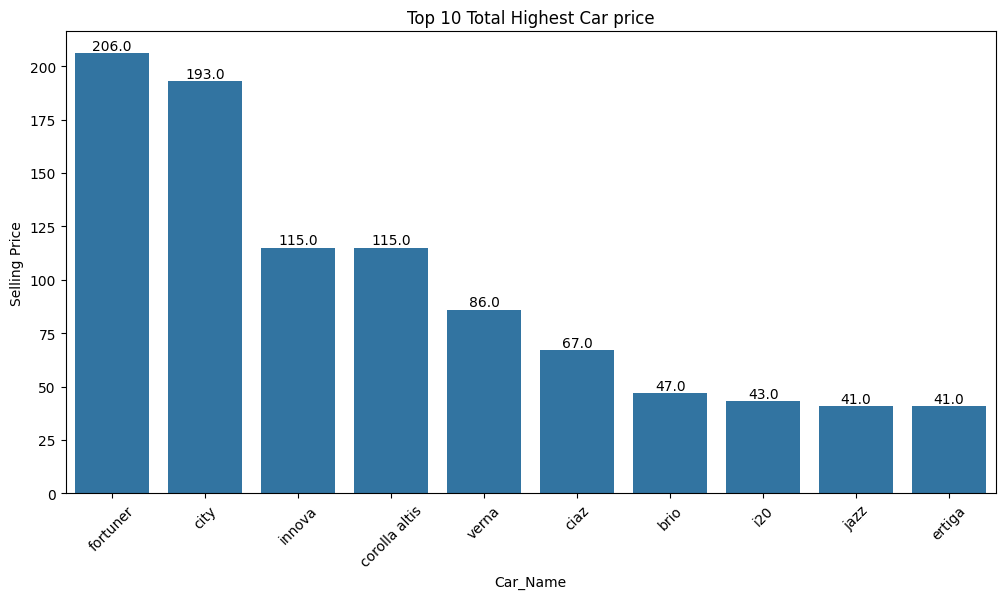

In [10]:
#Visualization Highest total price
plt.figure(figsize =(12,6))
sns.barplot(x= 'Car_Name',y= 'Selling_Price',data = highcarprice)

# Add labels above bars
for i, value in enumerate(highcarprice['Selling_Price']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Total Highest Car price')
plt.xlabel('Car_Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

The Car is highest total selling price is Fortuner.

In [11]:
## Question 2. What is common car in dataset
num_car = pd.DataFrame(df['Car_Name'].value_counts()\
          .head(10))
num_car

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
ciaz,9
innova,9
i20,9
grand i10,8


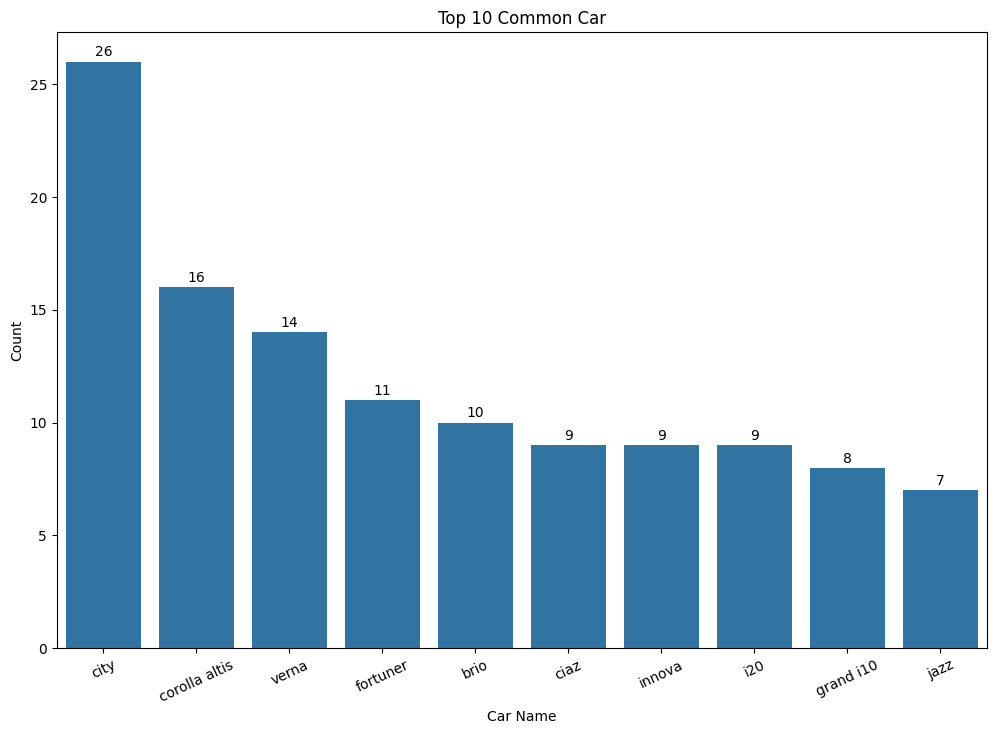

In [12]:
#Viualization top 10 common car
plt.figure(figsize = (12,8))
sns.barplot(num_car, x= 'Car_Name',y = 'count')

# Add labels above bars
for i, value in enumerate(num_car['count']):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Top 10 Common Car')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.xticks(rotation=25)
plt.show()

The most common car in dataset is city which 26 cars.



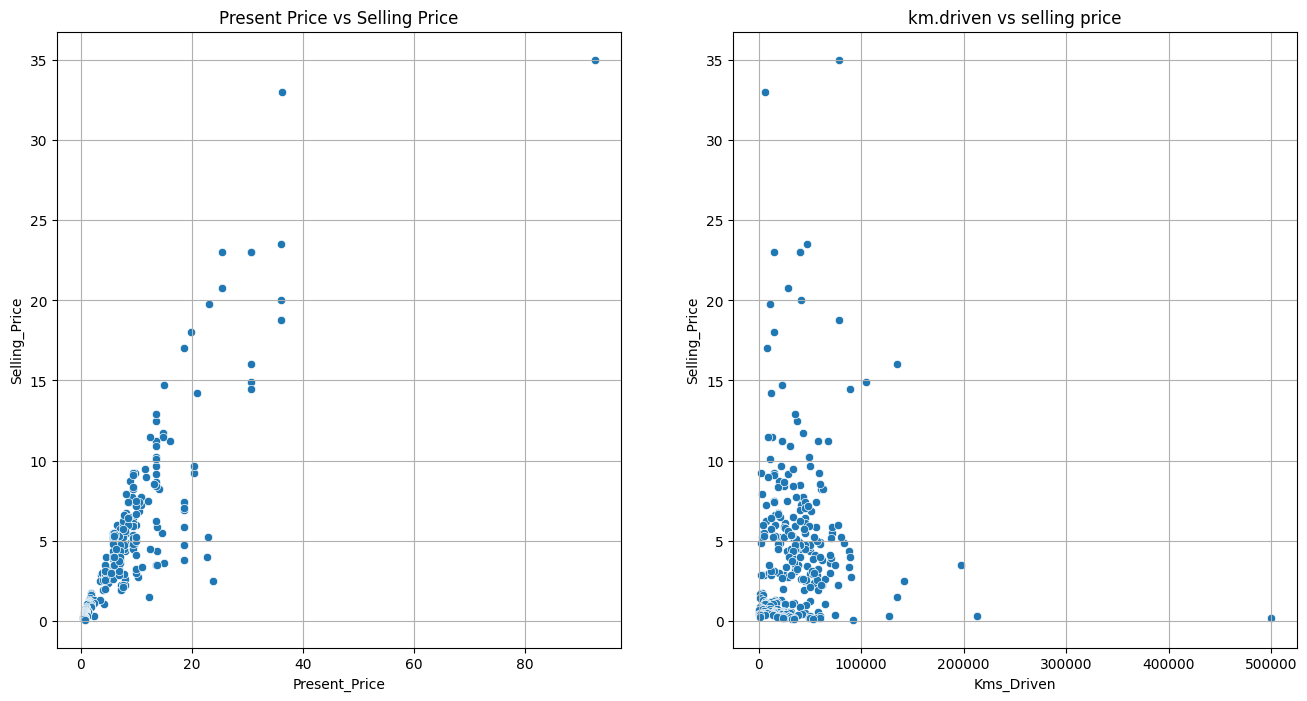

In [13]:
#Visualization Scatterplot for show relationship between present price and selling price
f = plt.figure(figsize=(16,8))
ax = f.add_subplot(121)
sns.scatterplot(df,x = 'Present_Price',y = 'Selling_Price',ax = ax)
plt.title('Present Price vs Selling Price')
plt.grid()

ax = f.add_subplot(122)
sns.scatterplot(df , x = 'Kms_Driven',y = 'Selling_Price')
plt.title('km.driven vs selling price')
plt.grid()

Most people like to buy the car have 0-10 kilometers and by the car that selling price have 0-100000.

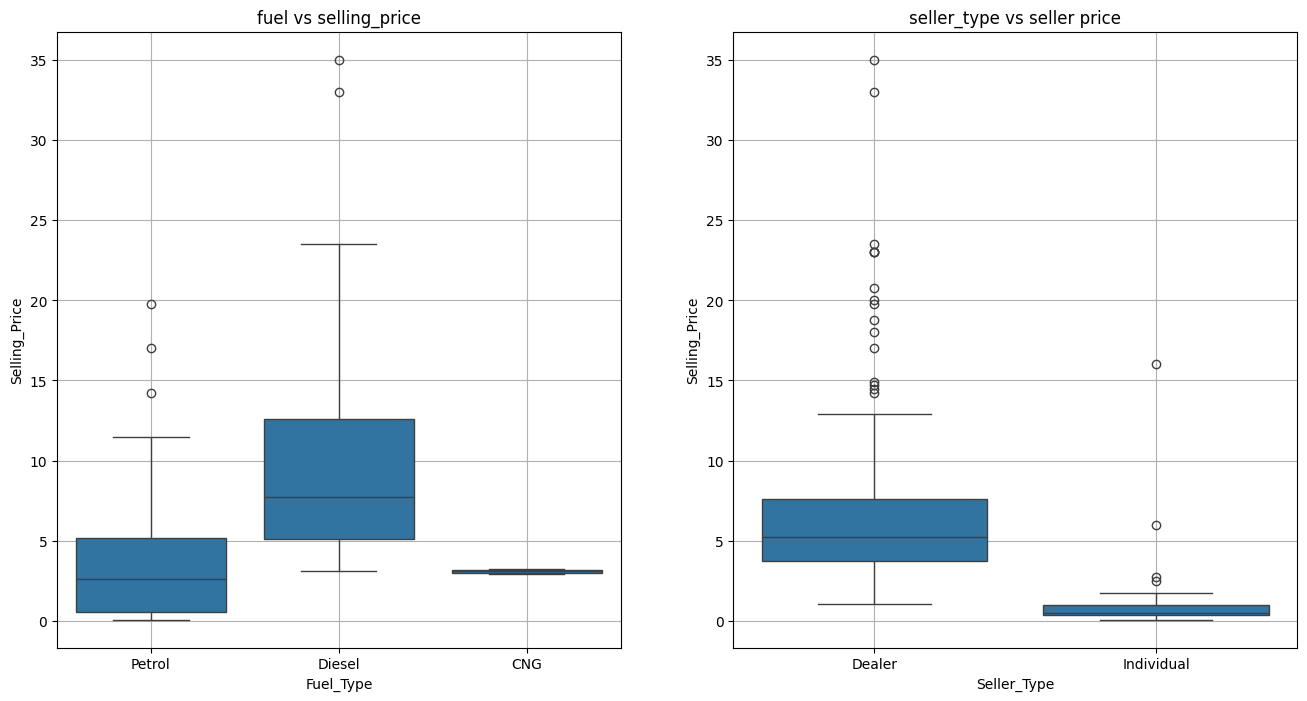

In [14]:
f = plt.figure(figsize=(16,8))

ax = f.add_subplot(121)
sns.boxplot( df, x = 'Fuel_Type',y= 'Selling_Price')
plt.title('fuel vs selling_price')
plt.grid()

ax = f.add_subplot(122)
sns.boxplot( df, x = 'Seller_Type',y = 'Selling_Price')
plt.title('seller_type vs seller price')
plt.grid()

* Most common fuel type is Diesel , lowest fuel type is CNG.
* Highest fuel selling price is Diesel fuel type , lowest fuel selling price is CNG.
*   Most common seller type is Dealer type , lowest seller type is Individual Dealer.
*  Highest price of seller type is Dealer , lowest price of seller type is Individual Dealer.



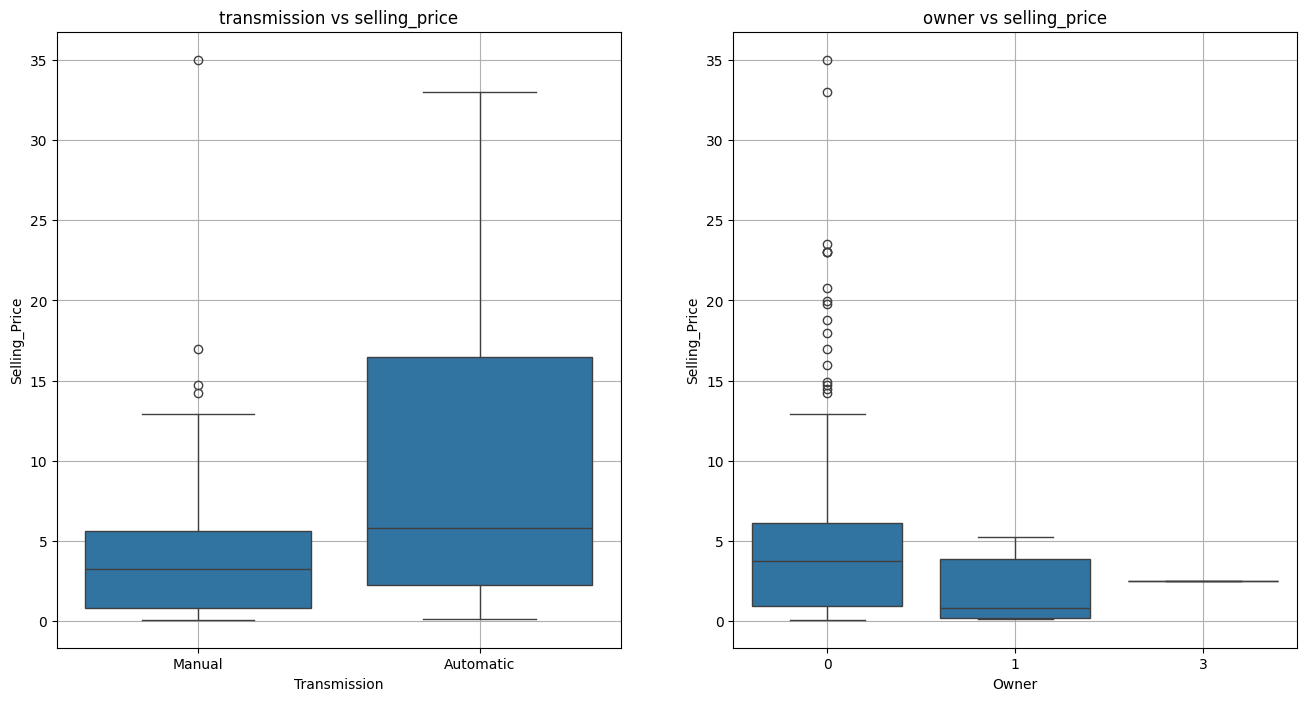

In [15]:
f = plt.figure(figsize = (16,8))

ax=f.add_subplot(121)
sns.boxplot(df, x= 'Transmission',y = 'Selling_Price')
plt.title('transmission vs selling_price')
plt.grid()

ax = f.add_subplot(122)
sns.boxplot(df, x = 'Owner',y ='Selling_Price')
plt.title('owner vs selling_price')
plt.grid()



*   Car with autometic transmission have more than a car with manual transmission.
*   Manual transmission is cheaper than Automatic transmision but manual transmission easily Maintenance than automatic transmission.
*   A zero owner car is a most expensive than other owner type in dataset because it has never been owned by anyone before , newest condition and has never been used before.em




# Step 3. Data Preprocessing

In [16]:
#Detect outlier with IQR method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)

Q1 = df['Selling_Price'].quantile(0.25)
Q3 = df['Selling_Price'].quantile(0.75)

IQR = Q3-Q1

In [17]:
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2 = df[(df['Selling_Price'] >= lower_bound) & (df['Selling_Price'] <= upper_bound)]

print("before drop outlier :",df.shape)
print("after drop outlier :",df2.shape)

before drop outlier : (301, 8)
after drop outlier : (284, 8)


In [18]:
#Segerate data
Cat_col = df2.select_dtypes(include = ['object']).columns
Con_col = df2.select_dtypes(exclude = ['object']).columns
df_cat = df2[Cat_col]
df_con = df2[Con_col]
print(df_cat.columns)
print(df_con.columns)

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')
Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')


In [19]:
df_cat = df_cat.drop('Car_Name',axis =1)

In [20]:
#Get dummie variable
dummies = pd.get_dummies(df_cat).astype('float64')

print('dummies shape :',dummies.shape)
dummies.head()

dummies shape : (284, 7)


,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [21]:
df_merge = pd.concat([df_con,dummies],axis = 1)
df_merge.shape

(284, 11)

In [22]:
#Visualization Correlation
corr = df_merge.corr()
corr

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
Selling_Price,1.000000,0.801950,-0.002729,-0.095591,-0.016900,0.464175,-0.452552,0.750623,-0.750623,0.033364,-0.033364
Present_Price,0.801950,1.000000,0.230465,0.064788,0.003701,0.354292,-0.349124,0.726300,-0.726300,0.128644,-0.128644
Kms_Driven,-0.002729,0.230465,1.000000,0.094191,0.013674,0.148862,-0.149395,0.114642,-0.114642,0.150737,-0.150737
Owner,-0.095591,0.064788,0.094191,1.000000,-0.015143,-0.041508,0.044185,-0.120161,0.120161,0.083188,-0.083188
Fuel_Type_CNG,-0.016900,0.003701,0.013674,-0.015143,1.000000,-0.037024,-0.186735,0.064500,-0.064500,-0.027296,0.027296
Fuel_Type_Diesel,0.464175,0.354292,0.148862,-0.041508,-0.037024,1.000000,-0.974823,0.336712,-0.336712,-0.142497,0.142497
Fuel_Type_Petrol,-0.452552,-0.349124,-0.149395,0.044185,-0.186735,-0.974823,1.000000,-0.345408,0.345408,0.146177,-0.146177
Seller_Type_Dealer,0.750623,0.726300,0.114642,-0.120161,0.064500,0.336712,-0.345408,1.000000,-1.000000,-0.000438,0.000438
Seller_Type_Individual,-0.750623,-0.726300,-0.114642,0.120161,-0.064500,-0.336712,0.345408,-1.000000,1.000000,0.000438,-0.000438
Transmission_Automatic,0.033364,0.128644,0.150737,0.083188,-0.027296,-0.142497,0.146177,-0.000438,0.000438,1.000000,-1.000000


In [23]:
X= df_merge.drop(columns = 'Selling_Price',axis = 1)
y = df_merge['Selling_Price']

In [24]:
#Split train test
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

print('X_train shape :',X_train.shape)
print('X_test shape :',X_test.shape)
print('y_train shape :',y_train.shape)
print('y_test shape :',y_test.shape)

X_train shape : (227, 10)
X_test shape : (57, 10)
y_train shape : (227,)
y_test shape : (57,)


In [26]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
193,0.65,24000,1,0.0,0.0,1.0,0.0,1.0,0.0,1.0
278,8.40,4000,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
174,0.72,38600,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
27,6.49,16200,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
190,0.75,60000,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# Step 4. Train,Test Model

**Linear Regression model**

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression()

In [29]:
print("Intercept : ",lm.intercept_)

Intercept :  1.547256133314348


In [30]:
#Predictions linear regression train data
y_pred = lm.predict(X_train)

In [31]:
#Evalution train score
from sklearn import metrics
import math

print("R2 score: ",metrics.r2_score(y_train,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_train,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score:  0.7615167838490089
Mean Absolute Error:  0.9764654360554902
mean-squared-error: 2.095858034517466
RMSE: 1.4477078553760305


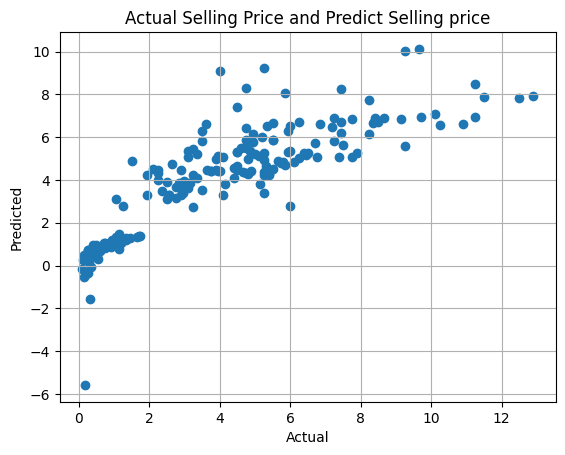

In [32]:
plt.scatter(y_train,y_pred)
plt.title('Actual Selling Price and Predict Selling price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [33]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [34]:
#Evalution test linear model
R2_linear = metrics.r2_score(y_test,y_test_pred)
print("R2 score: ",R2_linear)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_test_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 score:  0.7746389190354903
Mean Absolute Error:  1.1072014711065226
mean-squared-error: 2.4023412989111805
RMSE: 1.5499488052549286


**Random Forest Regressor Model**

In [35]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 100,max_features= 0.5,
                            min_samples_leaf =3,n_jobs = -1 , oob_score= False)

In [36]:
#Train Random Forest Regressor
reg.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_jobs=-1)

In [37]:
#Prediction with test data
y_pred = reg.predict(X_train)

In [38]:
#Model Evalution
print("R2 score: ",metrics.r2_score(y_train,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_train,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score:  0.9333735606686424
Mean Absolute Error:  0.4632994246125866
mean-squared-error: 0.5855320153662557
RMSE: 0.7652006373273977


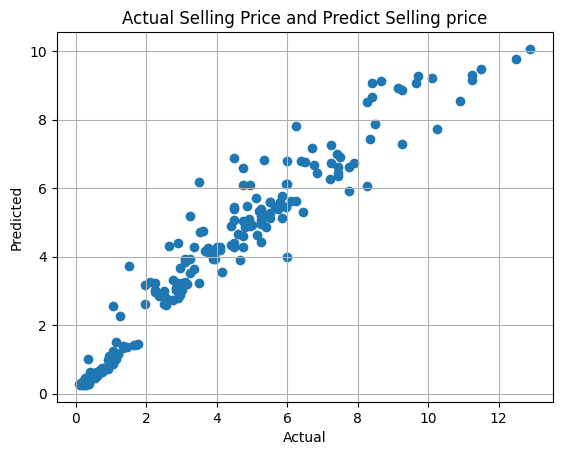

In [39]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.title('Actual Selling Price and Predict Selling price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [40]:
#Predict Random Forest test data
y_test_pred = reg.predict(X_test)

In [41]:
#model Evalution
R2_Random_forest = metrics.r2_score(y_test,y_test_pred)
print("R2 score: ",R2_Random_forest)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_test_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 score:  0.864976907520003
Mean Absolute Error:  0.7622277647960122
mean-squared-error: 1.4393414780544247
RMSE: 1.1997255844793944


**XGBoost Regressor Model**

In [42]:
from xgboost import XGBRegressor
XGreg = XGBRegressor(n_estimators = 100,max_depth = 3 ,learning_rate = 0.1)

In [43]:
#Train XGBoost model
XGreg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
#Prediction train data with XGBoost model
y_pred = XGreg.predict(X_train)

In [45]:
#Model Evalution
print("R2 score: ",metrics.r2_score(y_train,y_pred))
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_train,y_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_train,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R2 score:  0.976821002927826
Mean Absolute Error:  0.29549895320694874
mean-squared-error: 0.20370358983675882
RMSE: 0.4513353407797342


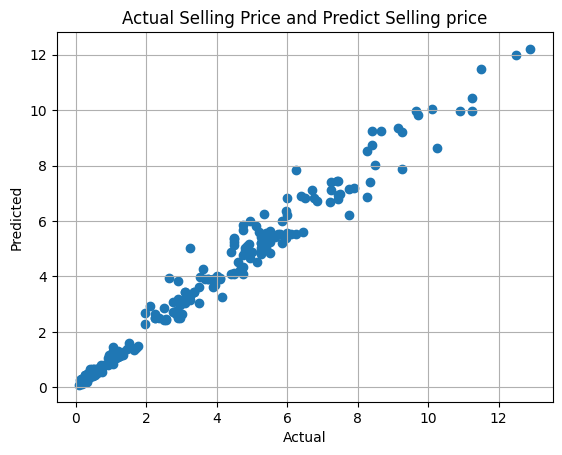

In [46]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train,y_pred)
plt.title('Actual Selling Price and Predict Selling price')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [47]:
#Prediction Test data with XGBoost model
y_test_pred = XGreg.predict(X_test)

In [48]:
R2_XGBoost = metrics.r2_score(y_test,y_test_pred)
print("R2 score: ",R2_XGBoost)
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test,y_test_pred))
print("mean-squared-error:" ,metrics.mean_squared_error(y_test,y_test_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R2 score:  0.8455330037191957
Mean Absolute Error:  0.8043035921297575
mean-squared-error: 1.646612817510289
RMSE: 1.2832041215294974


# Step 5. Evaluation and comparision of all the models

In [49]:
models = pd.DataFrame({'model':['Linear Regression','Random_Forest','XGBoost'],
                       'R2 Score':[R2_linear,R2_Random_forest,R2_XGBoost]})
models.sort_values(by = 'R2 Score',ascending = False)

,model,R2 Score
1,Random_Forest,0.864977
2,XGBoost,0.845533
0,Linear Regression,0.774639


Random Forest is best prediction model for this dataset.